<a href="https://colab.research.google.com/github/egomezv19/Front_mobile/blob/main/pruebaProyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Path to the file

path_file_train = '/content/train.csv'
path_file_test = "/content/test.csv"
path_file_meta = "/content/metaData.csv"

df_train = pd.read_csv(path_file_train)
df_test = pd.read_csv(path_file_test)
df_meta = pd.read_csv(path_file_meta)

In [24]:
#para mostrar las primeras columnas
# Ver las columnas del DataFrame df_train
print("Columnas de df_train:")
print(df_train.columns)

# Ver las columnas del DataFrame df_test
print("\nColumnas de df_test:")
print(df_test.columns)

# Ver las columnas del DataFrame df_meta
print("\nColumnas de df_meta:")
print(df_meta.columns)

Columnas de df_train:
Index(['FECHA_CORTE', 'ANIO_EJEC', 'SECTOR', 'PLIEGO', 'UNIDAD_EJECUTORA',
       'SEC_EJEC', 'PROGRAMA_PPTAL', 'TIPO_PROD_PROY', 'PRODUCTO_PROYECTO',
       'TIPO_ACT_OBRA_ACCINV', 'ACT_OBRA_ACCINV', 'FUNCION', 'DIVISION_FN',
       'GRUPO_FN', 'META', 'FINALIDAD', 'UNIDAD_MEDIDA', 'CANT_META_ANUAL',
       'CANT_META_SEM', 'AVAN_FISICO_ANUAL', 'AVAN_FISICO_SEM', 'SEC_FUNC',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'FUENTE_FINANC',
       'RUBRO', 'CATEGORIA_GASTO', 'TIPO_TRANSACCION', 'GENERICA',
       'SUBGENERICA', 'SUBGENERICA_DET', 'ESPECIFICA', 'ESPECIFICA_DET',
       'MTO_PIA'],
      dtype='object')

Columnas de df_test:
Index(['FECHA_CORTE', 'ANIO_EJEC', 'SECTOR', 'PLIEGO', 'UNIDAD_EJECUTORA',
       'SEC_EJEC', 'PROGRAMA_PPTAL', 'TIPO_PROD_PROY', 'PRODUCTO_PROYECTO',
       'TIPO_ACT_OBRA_ACCINV', 'ACT_OBRA_ACCINV', 'FUNCION', 'DIVISION_FN',
       'GRUPO_FN', 'META', 'FINALIDAD', 'UNIDAD_MEDIDA', 'CANT_META_ANUAL',
       'CANT_META_

In [17]:
# Eliminar variables innecearias
# Se eliminan las variables que no aportan información relevante al modelo (Las que están depsues de MTO_PIA).
def remove_after_MTO_PIA(df, name_data, col_or_row):
    if (col_or_row >= 2):  # To columns
        pos_column = df.columns.get_loc(name_data) + 3 - col_or_row
        df.drop(df.columns[pos_column:], axis=1 , inplace = True)
    else:  # To rows = 1
        pos_row = df[df["Variable"] == name_data].index[0]+1
        df.drop(df.index[pos_row:], axis=0, inplace=True)


remove_after_MTO_PIA(df_train, "MTO_PIA", 2)
remove_after_MTO_PIA(df_test, "MTO_MODIFICACIONES", 3)
remove_after_MTO_PIA(df_meta, "MTO_PIA", 1)

In [70]:
# Seleccionar las columnas SEC_FUNC, FINALIDAD y UNIDAD_MEDIDA en cada conjunto de datos
columnas_analisis = ['SEC_FUNC', 'FINALIDAD', 'UNIDAD_MEDIDA']

# Realizar el análisis en df_train
df_train_seleccionado = df_train[columnas_analisis]

# Realizar el análisis en df_test
df_test_seleccionado = df_test[columnas_analisis]


# Mostrar las primeras filas del conjunto de datos seleccionado para df_train
print("\nConjunto de datos seleccionado para df_train:")
print(df_train_seleccionado.head())

# Mostrar las primeras filas del conjunto de datos seleccionado para df_test
print("\nConjunto de datos seleccionado para df_test:")
print(df_test_seleccionado.head())






Conjunto de datos seleccionado para df_train:
   SEC_FUNC  FINALIDAD  UNIDAD_MEDIDA
0         9          2              8
1        23          2              8
2        41         12              1
3         4          2              3
4        10          2              8

Conjunto de datos seleccionado para df_test:
   SEC_FUNC                                          FINALIDAD  UNIDAD_MEDIDA
0        39  0307250.FORTALECIMIENTO ARTICULADO DE LAS PRES...  00060.INFORME
1        32  0251525.PROMOCION DE LA IMPLEMENTACION DE LAS ...  00060.INFORME
2        29  0145711.OPERATIVIDAD DEL FONDO DE ESTIMULO AL ...  00060.INFORME
3        29  0145711.OPERATIVIDAD DEL FONDO DE ESTIMULO AL ...  00060.INFORME
4        12     0072183.ACCIONES DE PRENSA, IMAGEN Y PROTOCOLO  00060.INFORME


In [ ]:
#Label encoder se supone
#Variables que usar SEC_FUNC,FINALIDAD Y UNIDAD_MEDIDA
df_train.head()
df_train.dtypes #para hallar los tipos object y cambiarlos a int mas adelante



In [ ]:
#df_train['FINALIDAD'].unique()
df_train['FINALIDAD'].value_counts()


In [41]:
from sklearn.preprocessing import LabelEncoder #codigo base para que funcione el label
label_encoder = LabelEncoder()
print(label_encoder)

LabelEncoder()


In [66]:
df_train['FINALIDAD']= label_encoder.fit_transform(df_train['FINALIDAD']) #en los corchetes solo cambios las variables que queremos pasar de object a int
df_train.head()
'''
se puede volver a probar con esto que los codigos se cambiaron
#df_train['FINALIDAD'].unique()
df_train['FINALIDAD'].value_counts()
'''


,FECHA_CORTE,ANIO_EJEC,SECTOR,PLIEGO,UNIDAD_EJECUTORA,SEC_EJEC,PROGRAMA_PPTAL,TIPO_PROD_PROY,PRODUCTO_PROYECTO,TIPO_ACT_OBRA_ACCINV,...,FUENTE_FINANC,RUBRO,CATEGORIA_GASTO,TIPO_TRANSACCION,GENERICA,SUBGENERICA,SUBGENERICA_DET,ESPECIFICA,ESPECIFICA_DET,MTO_PIA
0,20230201,2023,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,008. PROGRAMA NACIONAL PLATAFORMAS DE ACCION ...,1674,9001.ACCIONES CENTRALES,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,1.RECURSOS ORDINARIOS,00.RECURSOS ORDINARIOS,5.GASTOS CORRIENTES,2.GASTOS PRESUPUESTARIOS,3.BIENES Y SERVICIOS,2.CONTRATACION DE SERVICIOS,"6.SERVICIOS ADMINISTRATIVOS, FINANCIEROS Y DE ...",3.SEGUROS,99.OTROS SEGUROS DE BIENES MUEBLES E INMUEBLES,0
1,20230201,2023,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,008. PROGRAMA NACIONAL PLATAFORMAS DE ACCION ...,1674,9001.ACCIONES CENTRALES,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,1.RECURSOS ORDINARIOS,00.RECURSOS ORDINARIOS,5.GASTOS CORRIENTES,2.GASTOS PRESUPUESTARIOS,3.BIENES Y SERVICIOS,2.CONTRATACION DE SERVICIOS,1.VIAJES,2.VIAJES DOMESTICOS,2.VIATICOS Y ASIGNACIONES POR COMISION DE SERV...,805
2,20230201,2023,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,008. PROGRAMA NACIONAL PLATAFORMAS DE ACCION ...,1674,9002.ASIGNACIONES PRESUPUESTARIAS QUE NO RESUL...,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,1.RECURSOS ORDINARIOS,00.RECURSOS ORDINARIOS,5.GASTOS CORRIENTES,2.GASTOS PRESUPUESTARIOS,3.BIENES Y SERVICIOS,2.CONTRATACION DE SERVICIOS,8.CONTRATO ADMINISTRATIVO DE SERVICIOS,1.CONTRATO ADMINISTRATIVO DE SERVICIOS,10.OTROS BONOS EXTRAORDINARIOS,0
3,20230201,2023,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,008. PROGRAMA NACIONAL PLATAFORMAS DE ACCION ...,1674,9001.ACCIONES CENTRALES,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,1.RECURSOS ORDINARIOS,00.RECURSOS ORDINARIOS,5.GASTOS CORRIENTES,2.GASTOS PRESUPUESTARIOS,3.BIENES Y SERVICIOS,2.CONTRATACION DE SERVICIOS,"6.SERVICIOS ADMINISTRATIVOS, FINANCIEROS Y DE ...",3.SEGUROS,2.SEGURO DE VEHICULOS,0
4,20230201,2023,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,008. PROGRAMA NACIONAL PLATAFORMAS DE ACCION ...,1674,9001.ACCIONES CENTRALES,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,1.RECURSOS ORDINARIOS,00.RECURSOS ORDINARIOS,5.GASTOS CORRIENTES,2.GASTOS PRESUPUESTARIOS,3.BIENES Y SERVICIOS,2.CONTRATACION DE SERVICIOS,7.SERVICIOS PROFESIONALES Y TECNICOS,11.OTROS SERVICIOS,99.SERVICIOS DIVERSOS,8816


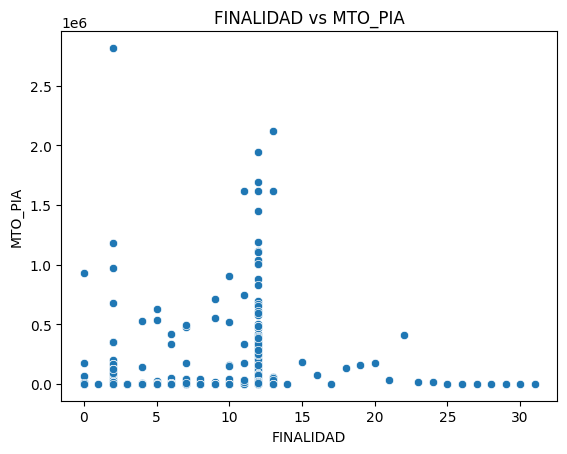

In [61]:
'''
import seaborn as sns
import matplotlib.pyplot as plt

#En caso quiera ver todas las graficas, que no creo xd
# y la variable objetivo es 'MTO_PIA'

# Obtener una lista de todas las columnas excepto 'MTO_PIA'
columns_to_plot = df_train.columns.tolist()
columns_to_plot.remove('MTO_PIA')

# Crear gráficos de dispersión para cada columna con respecto a 'MTO_PIA'
for column in columns_to_plot:
    sns.scatterplot(data=df_train, x=column, y='MTO_PIA')
    plt.title(f'{column} vs MTO_PIA')
    plt.xlabel(column)
    plt.ylabel('MTO_PIA')
    plt.show()
'''

import seaborn as sns
import matplotlib.pyplot as plt

# Cambiamos las X por la variable a visualizar
sns.scatterplot(data=df_train, x='FINALIDAD', y='MTO_PIA')
plt.title('FINALIDAD vs MTO_PIA')
plt.xlabel('FINALIDAD')
plt.ylabel('MTO_PIA')
plt.show()





Dos formas distintas de hacer la regresion lineal:

In [63]:
from sklearn.linear_model import LinearRegression


# Supongamos que tienes tus datos de entrenamiento preparados en X_train y Y_train
# y 'FINALIDAD' es tu columna de característica


model = LinearRegression()

# Entrenar el modelo con 'FINALIDDAD' como característica y 'MTO_PIA' como variable objetivo
X_train = df_train[['FINALIDAD']]  # Convertimos la columna 'FINALIDAD' en un DataFrame
Y_train = df_train['MTO_PIA']
model.fit(X_train, Y_train)

# Hacer predicciones
Y_pred_train = model.predict(X_train)

# error cuadrático medio (MSE) o el coeficiente de determinación (R^2)
from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(Y_train, Y_pred_train)
r2_train = r2_score(Y_train, Y_pred_train)

print("Error cuadrático medio (MSE) en los datos de entrenamiento:", mse_train)
print("Coeficiente de determinación (R^2) en los datos de entrenamiento:", r2_train)

Error cuadrático medio (MSE) en los datos de entrenamiento: 33825517737.52875
Coeficiente de determinación (R^2) en los datos de entrenamiento: 0.005462863958332842


In [62]:
import numpy as np

# Definir la función de hipótesis
def h(X, W):
    return np.dot(X, W)

# Definir la función de pérdida
def error(X, W, Y, lam):
    n = len(Y)
    return (np.linalg.norm(Y - h(X, W))**2) / (2 * n) + lam * np.linalg.norm(W)**2 / n

# Calcular la derivada de la función de pérdida
def derivada(X, W, Y, lam):
    n = len(Y)
    return np.matmul((Y - h(X, W)).T, -X) / n + 2 * lam * W / n

# Actualizar los parámetros usando el descenso de gradiente
def update(W, dW, alpha):
    return W - alpha * dW

# Datos X e Y
X_train = df_train[['FINALIDAD']].values  # Selecciona la columna 'FINALIDAD' como característica
Y_train = df_train['MTO_PIA'].values

# Inicializar los parámetros W (por ejemplo, con ceros)
W = np.zeros(X_train.shape[1])

# Hiperparámetros
num_iteraciones = 1000
lam = 0.1
alpha = 0.01

# Descenso de gradiente
for iteracion in range(num_iteraciones):
    dW = derivada(X_train, W, Y_train, lam)
    W = update(W, dW, alpha)

# Con los parámetros optimizados W, puedes hacer predicciones en nuevos datos

